In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression , LinearRegression

from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

import os.path
userhome = os.path.expanduser('~')
csvfile = os.path.join(userhome, 'Desktop', 'final', 'Dengue_Daily_EN.csv')
df = pd.read_csv(csvfile)

/Users/pipiterry/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/pipiterry/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df.drop(df.columns[[1,7,8,14,15,16,17,19,26,27,28,29]], axis=1, inplace=True)
df.head()

,Date_Onset,Date_Notification,Sex,Age_Group,County_living,Township_living,Enumeration_unit,Enumeration_unit_long,Enumeration_unit_lat,First_level_dissemination_unit,Second_level_dissemination_unit,Imported,Number_of_confirmed_cases,Serotype,MOI_County_living_Code,MOI_Township_living_Code,MOI_County_living,MOI_Township_living
0,1998/01/02,1998/01/07,M,40-44,Pingtung County,Pingtung City,A1320-0136-00,120.50588,22.46425,A1320-04-008,A1320-04,N,1,NaN,10013.0,1001301.0,Pingtung County,Pingtung City
1,1998/01/03,1998/01/14,M,30-34,Pingtung County,Donggang Township,A1303-0150-00,120.45364,22.46639,A1303-09-007,A1303-09,Y,1,DENV2,10013.0,1001303.0,Pingtung County,Donggang Township
2,1998/01/13,1998/02/18,M,55-59,Yilan County,Yilan City,A0201-0449-00,121.75143,24.74922,A0201-23-006,A0201-23,Y,1,NaN,10002.0,1000201.0,Yilan County,Yilan City
3,1998/01/15,1998/01/23,M,35-39,Kaohsiung City,Lingya Dist.,A6408-0153-00,120.33814,22.63032,A6408-10-010,A6408-10,N,1,NaN,64.0,6400800.0,Kaohsiung City,Lingya District
4,1998/01/20,1998/02/04,M,55-59,Yilan County,Wujie Township,A0209-0232-00,121.79826,24.68457,A0209-10-005,A0209-10,N,1,NaN,10002.0,1000209.0,Yilan County,Wujie Township


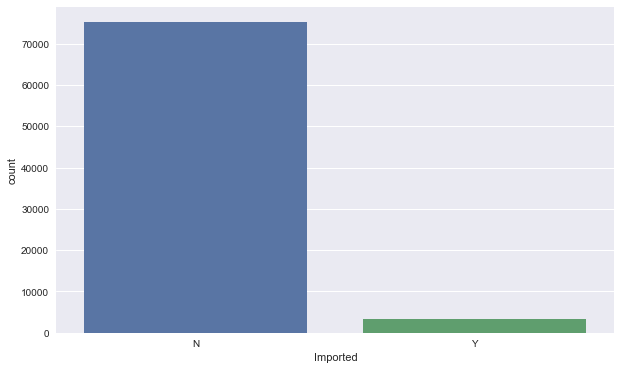

In [4]:
sns.countplot(x="Imported", data=df)
plt.show()

In [5]:
#這裡開始是把文字描述變成數字去呈現
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
le=preprocessing.LabelEncoder()
le.fit(df.Age_Group)
list(le.classes_)
df['Age_Group'].replace('0', '0-9', inplace=True)
df['Age_Group'].replace('1', '0-9', inplace=True)
df['Age_Group'].replace('2', '0-9', inplace=True)
df['Age_Group'].replace('3', '0-9', inplace=True)
df['Age_Group'].replace('4', '0-9', inplace=True)
df['Age_Group'].replace('5-9', '0-9', inplace=True)
le.fit(df.Age_Group)
list(le.classes_)

['0-9',
 '10-14',
 '15-19',
 '20-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64',
 '65-69',
 '70+']

In [6]:
df.Age_Group=le.transform(df.Age_Group)

In [7]:
le.fit(df.Sex)
list(le.classes_)

['F', 'M', 'U']

In [21]:
#清掉空資料的情況，U表示有不知道
df['Sex'].replace('U', np.nan, inplace=True)
df.dropna(subset=['Sex'], inplace=True)
le.fit(df.Sex)
list(le.classes_)
df.Sex=le.transform(df.Sex)

In [8]:
#all
df.isnull().any()

Date_Onset                         False
Date_Notification                  False
Sex                                False
Age_Group                          False
County_living                      False
Township_living                    False
Enumeration_unit                    True
Enumeration_unit_long               True
Enumeration_unit_lat                True
First_level_dissemination_unit      True
Second_level_dissemination_unit     True
Imported                           False
Number_of_confirmed_cases          False
Serotype                            True
MOI_County_living_Code              True
MOI_Township_living_Code            True
MOI_County_living                   True
MOI_Township_living                 True
dtype: bool

In [9]:
#清掉空資料的情況，true表示有空集合
df['Enumeration_unit_long'].replace('', np.nan, inplace=True)
df.dropna(subset=['Enumeration_unit_long'], inplace=True)
df.isnull().any()

Date_Onset                         False
Date_Notification                  False
Sex                                False
Age_Group                          False
County_living                      False
Township_living                    False
Enumeration_unit                   False
Enumeration_unit_long              False
Enumeration_unit_lat               False
First_level_dissemination_unit     False
Second_level_dissemination_unit    False
Imported                           False
Number_of_confirmed_cases          False
Serotype                            True
MOI_County_living_Code              True
MOI_Township_living_Code            True
MOI_County_living                   True
MOI_Township_living                 True
dtype: bool

In [22]:
from sklearn import preprocessing
X = np.array(df[['Age_Group','Sex','Enumeration_unit_long','Enumeration_unit_lat']])
# calculate mean  
X_mean = X.mean(axis=0)  
# calculate variance   
X_std = X.std(axis=0)  
# standardize X  
X1 = (X-X_mean)/X_std  # 自己计算
# use function preprocessing.scale to standardize X  
X_scale = preprocessing.scale(X)  # 调用sklearn包的方法
# 最终X1与X_scale等价
print(X_scale)

[[-0.11567395  1.00382273  0.83769597 -0.87472061]
 [-0.63544143  1.00382273  0.59135597 -0.86986831]
 [ 0.66397727  1.00382273  6.71114147  4.30628735]
 ..., 
 [ 0.14420979  1.00382273  6.02512416  5.00556255]
 [ 0.66397727  1.00382273  5.03726491  5.20407599]
 [-0.63544143 -0.99619183  1.09106214  3.31165681]]


In [23]:
Y = np.array(df['Imported'])
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, test_size=0.3, random_state=0)
X_train.shape,y_train.shape

((54672, 4), (54672,))

In [24]:
from sklearn import neighbors
#将训练集代入到KNN模型中
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
#使用测试集衡量模型准确度
clf.score(X_test, y_test)

0.97716797541823153

In [26]:
#查看分類的確切情況
from sklearn import tree
# 建立分類器
clf2 = tree.DecisionTreeClassifier()
iris_clf = clf.fit(X_train,y_train)
# 預測
test_y_predicted = iris_clf.predict(X_test)
print(test_y_predicted)

['N' 'N' 'N' ..., 'N' 'N' 'N']


In [27]:
#one of year
csvfile1 = os.path.join(userhome, 'Desktop', 'final', 'year', 'all_1998.csv')
df_1998 = pd.read_csv(csvfile1)
df_1998.isnull().any()

Date_Onset                         False
Date_Confirmation                   True
Date_Notification                  False
Sex                                False
Age_Group                          False
County_living                      False
Township_living                    False
Village_Living                      True
Village_Living_Code                 True
Enumeration_unit                    True
Enumeration_unit_long               True
Enumeration_unit_lat                True
First_level_dissemination_unit      True
Second_level_dissemination_unit     True
County_infected                     True
Township_infected                   True
Village_infected                    True
Village_infected_Code               True
Imported                           False
Country_infected                    True
Number_of_confirmed_cases          False
Serotype                            True
MOI_County_living_Code              True
MOI_Township_living_Code            True
MOI_County_livin

In [28]:
#清掉空資料的情況，true表示有空集合
df_1998['Enumeration_unit_long'].replace('', np.nan, inplace=True)
df_1998.dropna(subset=['Enumeration_unit_long'], inplace=True)
df_1998.isnull().any()

Date_Onset                         False
Date_Confirmation                   True
Date_Notification                  False
Sex                                False
Age_Group                          False
County_living                      False
Township_living                    False
Village_Living                      True
Village_Living_Code                 True
Enumeration_unit                   False
Enumeration_unit_long              False
Enumeration_unit_lat               False
First_level_dissemination_unit     False
Second_level_dissemination_unit    False
County_infected                     True
Township_infected                   True
Village_infected                    True
Village_infected_Code               True
Imported                           False
Country_infected                    True
Number_of_confirmed_cases          False
Serotype                            True
MOI_County_living_Code              True
MOI_Township_living_Code            True
MOI_County_livin

In [29]:
le.fit(df.Age_Group)
list(le.classes_)
df_1998['Age_Group'].replace('0', '0-9', inplace=True)
df_1998['Age_Group'].replace('1', '0-9', inplace=True)
df_1998['Age_Group'].replace('2', '0-9', inplace=True)
df_1998['Age_Group'].replace('3', '0-9', inplace=True)
df_1998['Age_Group'].replace('4', '0-9', inplace=True)
df_1998['Age_Group'].replace('5-9', '0-9', inplace=True)
le.fit(df_1998.Age_Group)
list(le.classes_)
df_1998.Age_Group=le.transform(df_1998.Age_Group)

In [33]:
#清掉空資料的情況，U表示有不知道
df_1998['Sex'].replace('U', np.nan, inplace=True)
df_1998.dropna(subset=['Sex'], inplace=True)
le.fit(df_1998.Sex)
list(le.classes_)
df_1998.Sex=le.transform(df_1998.Sex)

In [34]:
#new data
X = np.array(df_1998[['Age_Group','Sex','Enumeration_unit_long','Enumeration_unit_lat']])
Y = np.array(df_1998['Imported'])
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X1 = (X-X_mean)/X_std
X_scale = preprocessing.scale(X)

In [35]:
clf3 = tree.DecisionTreeClassifier()
im_clf = clf.fit(X_train,y_train)
# 預測
test_y_predicted = im_clf.predict(X_scale)
print(test_y_predicted)

['N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N'
 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N'
 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y'
 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N'
 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N

In [36]:
print(Y)

['N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N'
 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y'
 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N'
 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N'
 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N